DATA CLEANING DUPLICATES

In [6]:
import pandas as pd

data = ["satu", "satu", "dua", "tiga", "empat"]
series = pd.Series(data)
series

0     satu
1     satu
2      dua
3     tiga
4    empat
dtype: object

In [7]:
series.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [9]:
series.duplicated(keep = "last")

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [11]:
series.duplicated(keep = False)

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [8]:
series.drop_duplicates()

0     satu
2      dua
3     tiga
4    empat
dtype: object

In [12]:
series.drop_duplicates(keep = "last")

1     satu
2      dua
3     tiga
4    empat
dtype: object

In [13]:
series.drop_duplicates(keep = False)

2      dua
3     tiga
4    empat
dtype: object

In [19]:
frame = {
    "name" : ["agung", "emik", "agung", "fafa", "william"],
    "course" : ["analis", "marketing", "analis", "statistik", "analis"]
}

df = pd.DataFrame(frame)
df

,name,course
0,agung,analis
1,emik,marketing
2,agung,analis
3,fafa,statistik
4,william,analis


In [20]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [21]:
df.duplicated(subset=["course", "name"])

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [23]:
df

,name,course
0,agung,analis
1,emik,marketing
2,agung,analis
3,fafa,statistik
4,william,analis


In [24]:
df = df.set_index("name")
df

,course
name,
agung,analis
emik,marketing
agung,analis
fafa,statistik
william,analis


COMBINING DATA

In [35]:
data_2017 = pd.read_csv("user_age_2017.csv")
data_2018 = pd.read_csv("user_age_2018.csv")

data_2017

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017


In [36]:
data_2018

,userid,date
0,11,1/1/2018
1,12,1/2/2018
2,13,1/3/2018


In [39]:
data_combine = pd.concat([data_2017, data_2018])
data_combine

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017
0,11,1/1/2018
1,12,1/2/2018
2,13,1/3/2018


In [40]:
data_combine = pd.concat([data_2017, data_2018], ignore_index=True)
data_combine

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017
3,11,1/1/2018
4,12,1/2/2018
5,13,1/3/2018


BINNING DATA

In [41]:
data_combine["date"] = pd.to_datetime(data_combine["date"])
data_combine

,userid,date
0,7,2017-01-01
1,8,2017-01-02
2,9,2017-01-03
3,11,2018-01-01
4,12,2018-01-02
5,13,2018-01-03


In [45]:
from datetime import datetime

tanggal = datetime.now()

data_combine["age"] = (tanggal - data_combine["date"]).dt.days

data_combine

,userid,date,age
0,7,2017-01-01,2881
1,8,2017-01-02,2880
2,9,2017-01-03,2879
3,11,2018-01-01,2516
4,12,2018-01-02,2515
5,13,2018-01-03,2514


In [47]:
bins = [0, 2560, 2900]

labels = ['< 2600 day', '2600 to 2900 day']

data_combine['age_bin'] = pd.cut(data_combine['age'], bins = bins, labels = labels)

data_combine

,userid,date,age,age_bin
0,7,2017-01-01,2881,2600 to 2900 day
1,8,2017-01-02,2880,2600 to 2900 day
2,9,2017-01-03,2879,2600 to 2900 day
3,11,2018-01-01,2516,< 2600 day
4,12,2018-01-02,2515,< 2600 day
5,13,2018-01-03,2514,< 2600 day


ASSIGNMENT

In [ ]:
data = pd.read_csv("netflix_titles-1.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...,...
103,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
104,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
106,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...


In [ ]:
data = data.set_index("show_id")
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...
s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."


In [ ]:
data.duplicated()

show_id
s1     False
s2     False
s3     False
s4     False
s24    False
       ...  
s20     True
s96    False
s97    False
s98    False
s99    False
Length: 108, dtype: bool

In [ ]:
data.drop_duplicates()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...
s95,Movie,Show Dogs,Raja Gosnell,"Will Arnett, Ludacris, Natasha Lyonne, Stanley...","United Kingdom, United States","September 8, 2021",2018,PG,90 min,"Children & Family Movies, Comedies",A rough and tough police dog must go undercove...
s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."


DATA VISUALIZATION

In [50]:
jantung = pd.read_csv("penyakit_jantung.csv")
source = jantung[["sex", "age", "cp", "trestbps", "chol"]]
source.head()

,sex,age,cp,trestbps,chol
0,female,63,3,145,233
1,female,37,2,130,250
2,male,41,1,130,204
3,female,56,1,120,236
4,male,57,0,120,354


In [52]:
group = source.groupby("age")["age"].count()
group.head()

age
29    1
34    2
35    4
37    2
38    3
Name: age, dtype: int64

Matplotlib is building the font cache; this may take a moment.


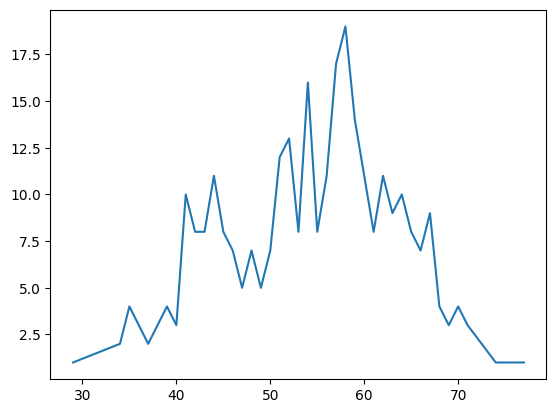

In [53]:
import matplotlib.pyplot as plt

plt.plot(group.index, group.values)
plt.show()

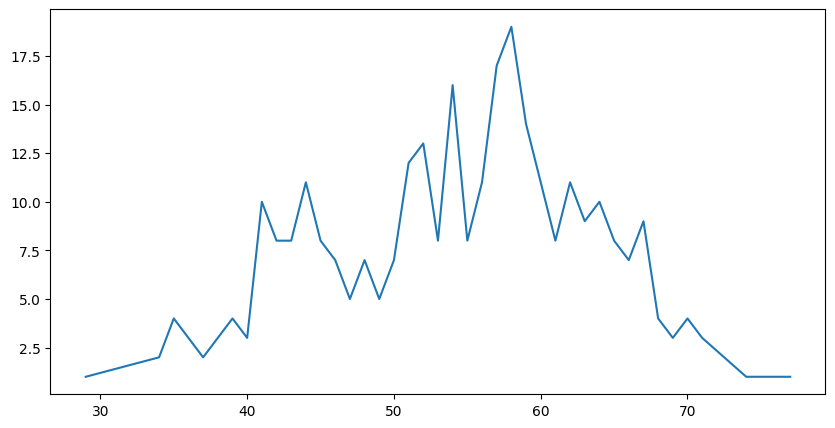

In [55]:
plt.figure(figsize=(10,5))
plt.plot(group.index, group.values)
plt.show()

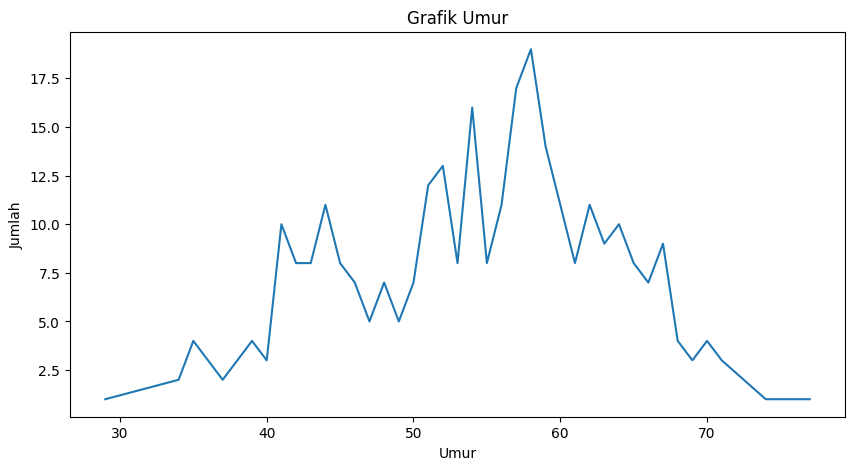

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(group.index, group.values)
plt.title("Grafik Umur")
plt.ylabel("Jumlah")
plt.xlabel("Umur")
plt.show()

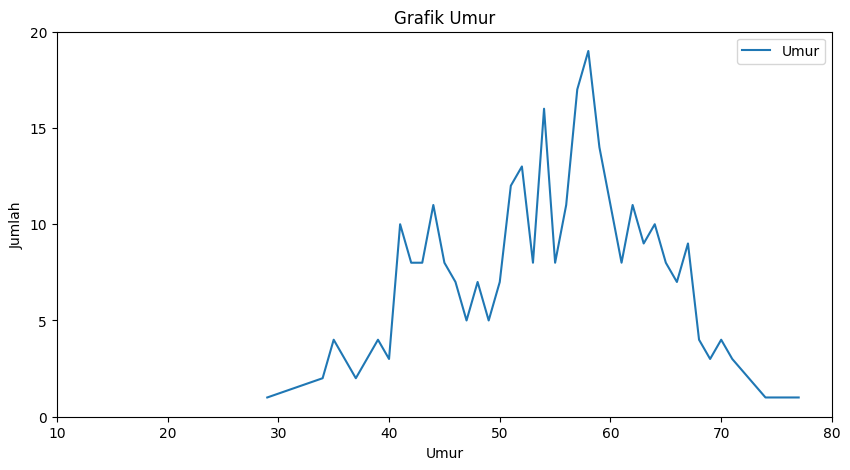

In [60]:
plt.figure(figsize=(10,5))
plt.plot(group.index, group.values, label = "Umur")
plt.title("Grafik Umur")
plt.ylabel("Jumlah")
plt.xlabel("Umur")
plt.yticks([0, 5, 10, 15, 20])
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80])
plt.legend()
plt.show()

In [63]:
gender = source.groupby("sex")["sex"].count()
gender.head()

sex
female    207
male       96
Name: sex, dtype: int64

ValueError: unsupported format character '%' (0x25) at index 4

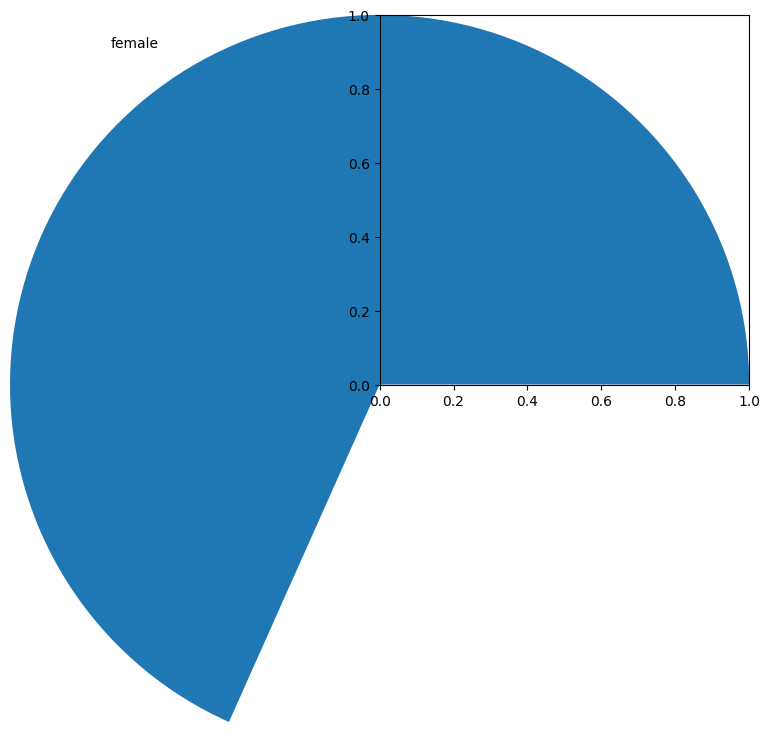

In [65]:
plt.pie(gender.values, labels = gender.index, autopct="%1.1%%")

plt.legend()
plt.show()